# 1. Extract historical price data for the stocks MSFT, AAPL, NVDA, AMZN, GOOG, META, and TSLA
using the Yahoo Finance API (yfnance). The data should span from 2013-01-01 to 2023-12-31

In [7]:
import yfinance as yf


# import id stock
stocks = ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSLA']

# extract data date from 2013-01-01 to 2023-12-31 for each stock
stock_data = yf.download(stocks, start="2013-01-01", end="2023-12-31")
stock_data.head()



[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                      \
Ticker           AAPL     AMZN       GOOG       META       MSFT      NVDA   
Date                                                                        
2013-01-02  16.747719  12.8655  18.013729  27.970324  22.532850  2.935840   
2013-01-03  16.536331  12.9240  18.024191  27.740568  22.230999  2.938148   
2013-01-04  16.075722  12.9575  18.380356  28.729517  21.814934  3.035086   
2013-01-07  15.981153  13.4230  18.300158  29.388819  21.774136  2.947381   
2013-01-08  16.024164  13.3190  18.264042  29.029200  21.659924  2.882755   

Price                     Close                      ...       Open          \
Ticker          TSLA       AAPL     AMZN       GOOG  ...       MSFT    NVDA   
Date                                                 ...                      
2013-01-02  2.357333  19.608213  12.8655  18.013729  ...  27.250000  3.1400   
2013-01-03  2.318000  19.360714  12.9240  18.024191  ...  27.629999  3.1800   
2013-01-04  2.293333  18.821428  12.9575  18.380356  ...  27.270000  3.1875   
2013-01-07  2.289333  18.710714  13.4230  18.300158  ...  26.770000  3.2850   
2013-01-08  2.245333  18.761070  13.3190  18.264042  ...  26.750000  3.2000   

Price                    Volume                                           \
Ticker          TSLA       AAPL      AMZN       GOOG      META      MSFT   
Date                                                                       
2013-01-02  2.333333  560518000  65420000  102033017  69846400  52899300   
2013-01-03  2.345333  352965200  55018000   93075567  63140600  48294400   
2013-01-04  2.320000  594333600  37484000  110954331  72715400  52521100   
2013-01-07  2.320000  484156400  98200000   66476239  83781800  37110400   
2013-01-08  2.300000  458707200  60214000   67295297  45871300  44703100   

Price                           
Ticker          NVDA      TSLA  
Date                            
2013-01-02  47883600  17922000  
2013-01-03  29888800  11130000  
2013-01-04  52496800  10110000  
2013-01-07  61073200   6630000  
2013-01-08  46642400  19260000  

[5 rows x 42 columns]

In [8]:
stock_data.columns = [f"{level1}_{level2}" for level1, level2 in stock_data.columns]
stock_data.index.name = 'Date'

# convert into data frame
stock_data.reset_index(inplace=True)

In [16]:
stock_data.columns
stock_data.shape

(2768, 43)

# 2. Implement the Double Bollinger Band indicator to generate buy and sell signals based on the
specifed strategy

In [10]:
import pandas as pd

def calculate_bollinger_bands(data, window=20, num_std=2):
    # Tính toán dải trung bình động
    middle_band = data.rolling(window=window).mean()

    # Tính toán độ lệch chuẩn của giá đóng cửa
    std = data.rolling(window=window).std()

    # Tính toán dải trên và dải dưới
    upper_band = middle_band + (num_std * std)
    lower_band = middle_band - (num_std * std)

    return middle_band, upper_band, lower_band

def generate_signals(data):
    signals = pd.DataFrame(index=data.index)
    signals['Buy Signal'] = data['Close'] < data['Lower Band']
    signals['Sell Signal'] = data['Close'] > data['Upper Band']
    return signals

# Định nghĩa danh sách các cột giá đóng cửa của các mã cổ phiếu
close_columns = ['Close_AAPL', 'Close_AMZN', 'Close_GOOG', 'Close_META', 'Close_MSFT', 'Close_NVDA', 'Close_TSLA']

# Tính toán Bollinger Bands cho từng cột
middle_bands = {}
upper_bands = {}
lower_bands = {}
for column in close_columns:
    middle_bands[column], upper_bands[column], lower_bands[column] = calculate_bollinger_bands(stock_data[column])

# Tạo ra tín hiệu mua và bán cho từng cổ phiếu
signals = {}
for column in close_columns:
    signals[column] = generate_signals(pd.DataFrame({'Close': stock_data[column], 'Middle Band': middle_bands[column], 'Upper Band': upper_bands[column], 'Lower Band': lower_bands[column]}))

# Hiển thị tín hiệu mua và bán cho từng cổ phiếu
# for column in close_columns:
#     print(f"Signals for {column}:")
#     print(signals[column])
# signals

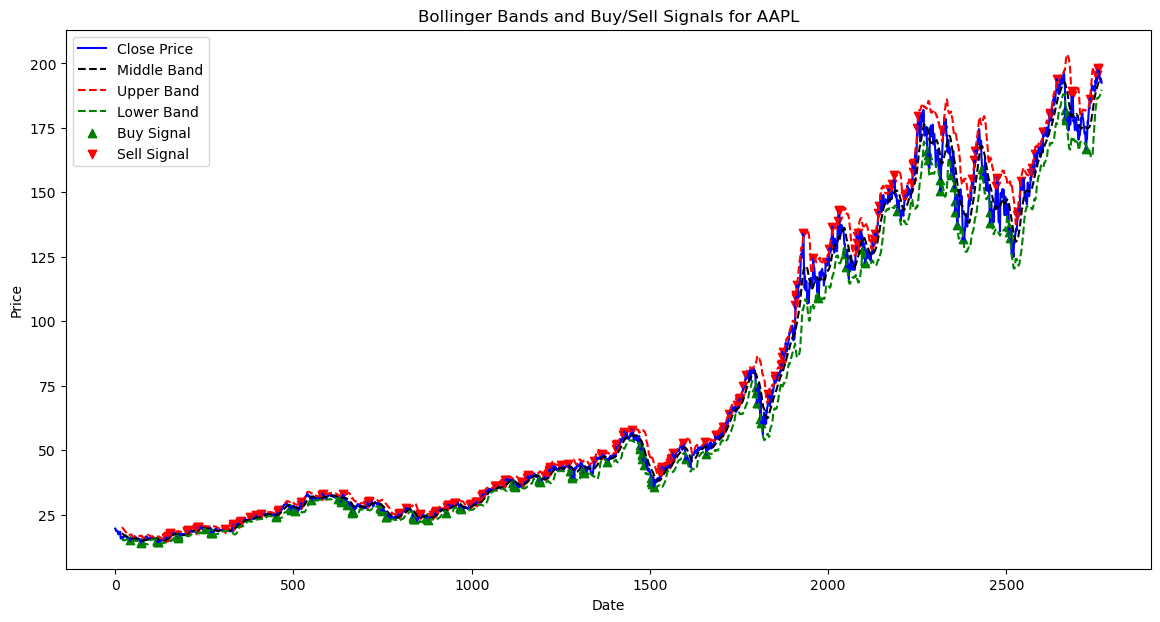

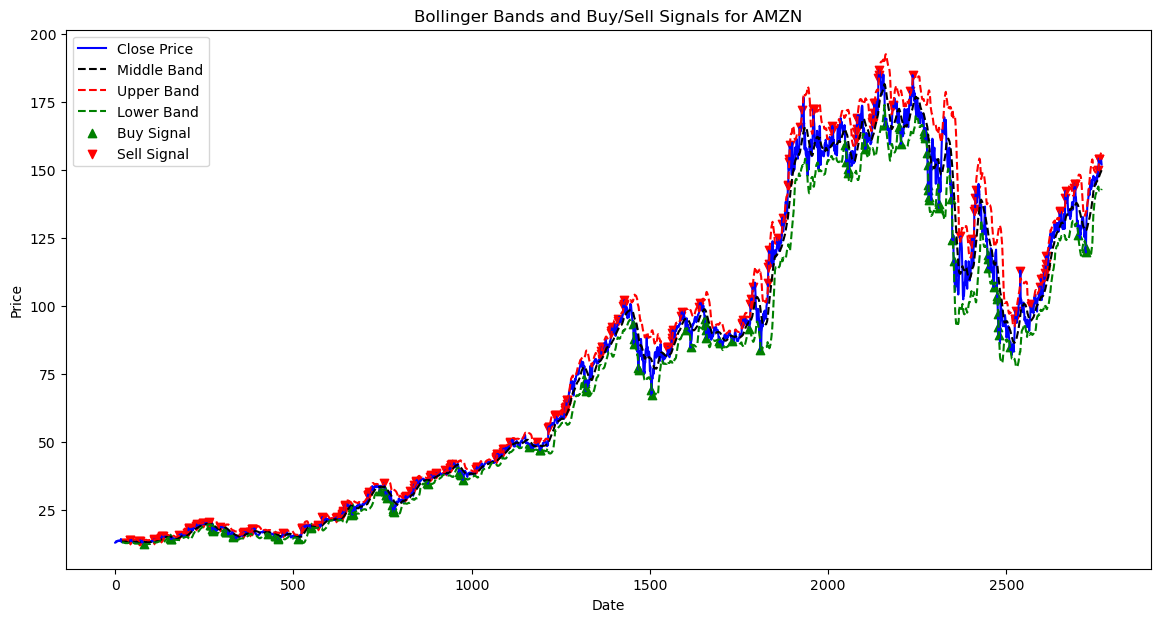

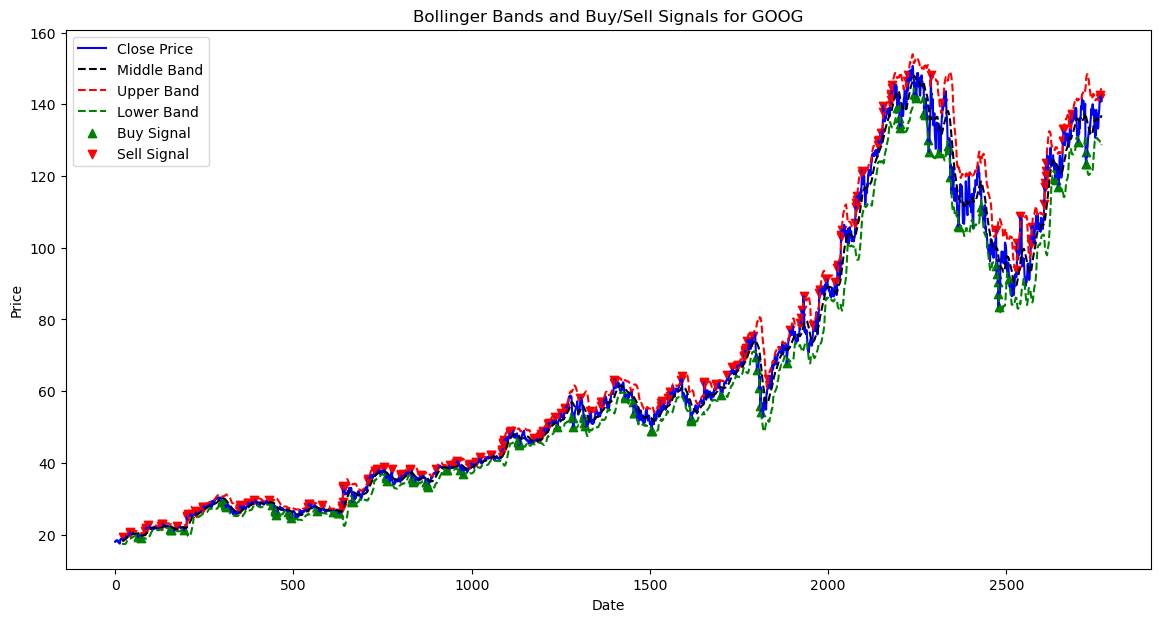

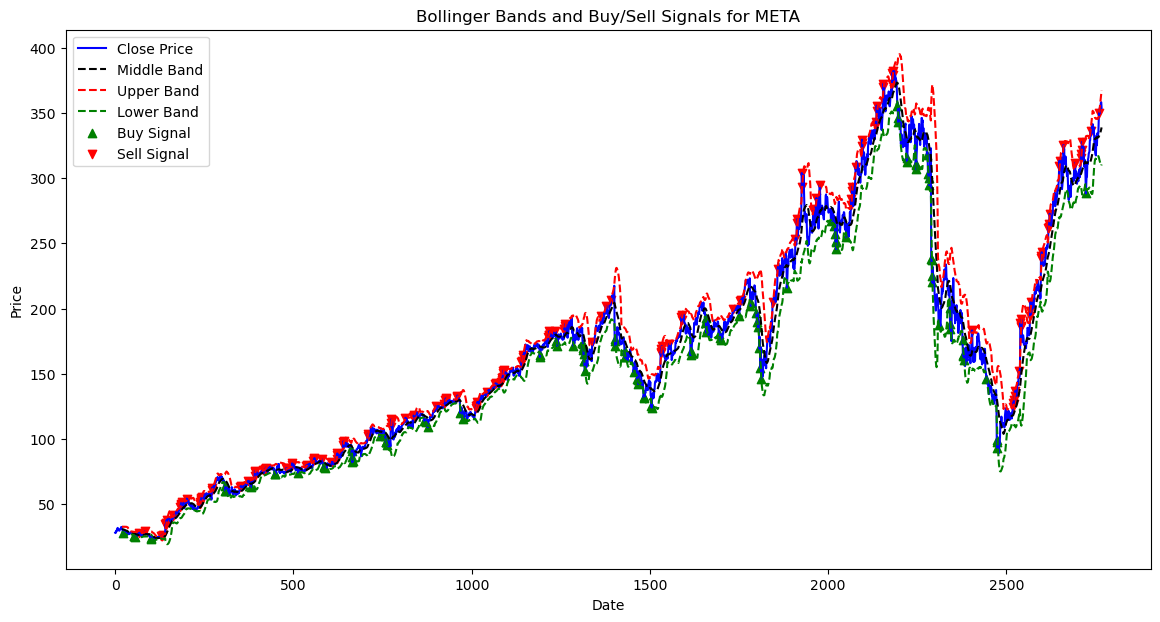

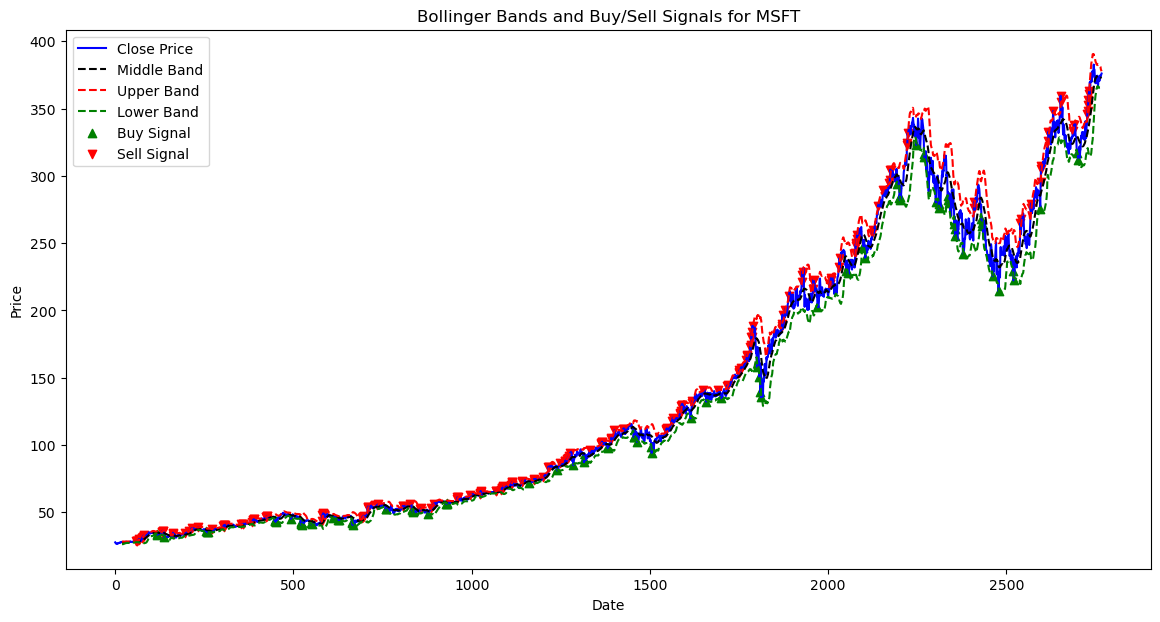

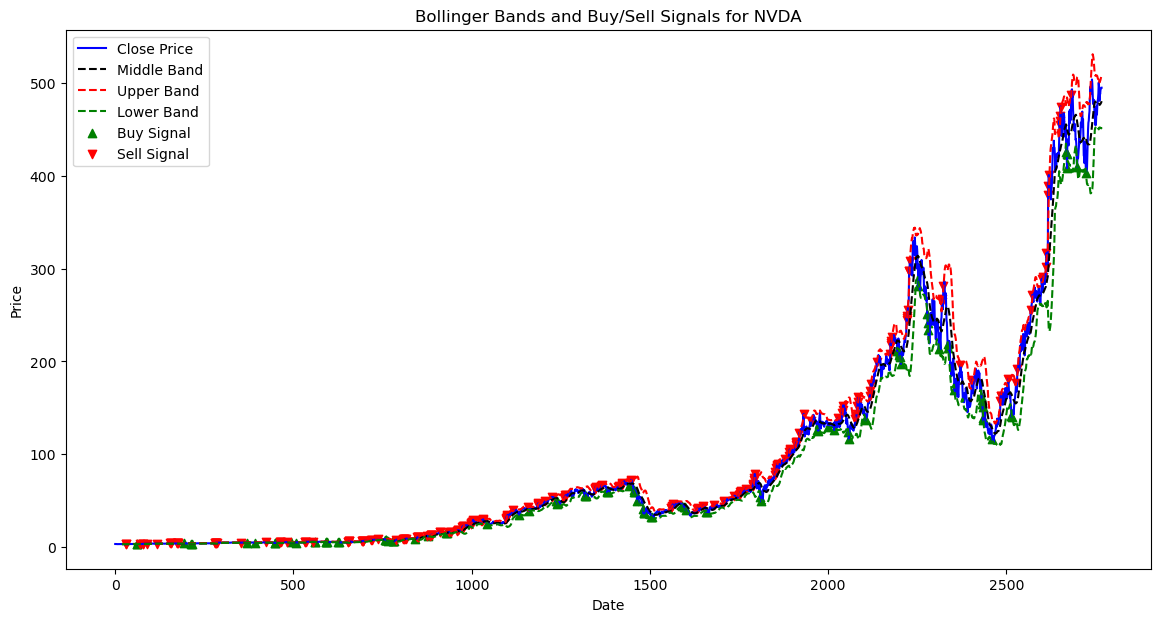

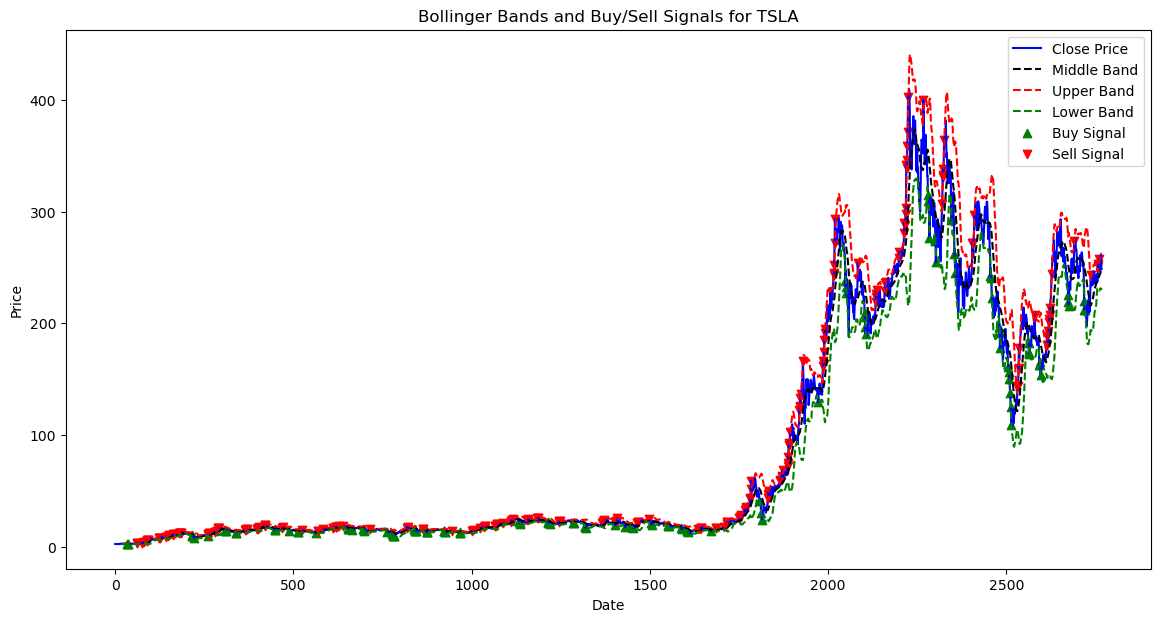

In [11]:
import matplotlib.pyplot as plt

def plot_signals(data, signals, stock_symbol):
    plt.figure(figsize=(14,7))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(data.index, data['Middle Band'], label='Middle Band', color='black', linestyle='--')
    plt.plot(data.index, data['Upper Band'], label='Upper Band', color='red', linestyle='--')
    plt.plot(data.index, data['Lower Band'], label='Lower Band', color='green', linestyle='--')
    plt.scatter(data.index[signals['Buy Signal']], data['Close'][signals['Buy Signal']], marker='^', color='green', label='Buy Signal')
    plt.scatter(data.index[signals['Sell Signal']], data['Close'][signals['Sell Signal']], marker='v', color='red', label='Sell Signal')
    plt.title(f'Bollinger Bands and Buy/Sell Signals for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


for column in close_columns:
    stock_symbol = column.split('_')[1]  # Lấy mã cổ phiếu từ tên cột
    plot_signals(pd.DataFrame({'Close': stock_data[column], 'Middle Band': middle_bands[column], 'Upper Band': upper_bands[column], 'Lower Band': lower_bands[column]}), signals[column], stock_symbol)


# 3. Design a backtestng loop to simulate trading with these signals. Assume an inital capital of
$10,000. The minimum transacton size is set at 1 share per trade

In [15]:
initial_capital = 10000  # Số tiền ban đầu
current_capital = initial_capital
# Khởi tạo số lượng cổ phiếu sở hữu cho mỗi cổ phiếu
shares_owned = {stock: 0 for stock in ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']}
total_trades = 0
profit = 0

# Duyệt qua từng điểm dữ liệu và thực hiện giao dịch
for index, row in stock_data.iterrows():
    for column in close_columns:
        signal = signals[column].loc[index]
        stock_symbol = column.split('_')[1]
        if signal['Buy Signal']:
            # Xác định số lượng cổ phiếu được mua
            share_price = row[column]
            shares_to_buy = min(1, current_capital // share_price)
            if shares_to_buy > 0:
                # Thực hiện giao dịch mua cổ phiếu
                total_cost = shares_to_buy * share_price
                current_capital -= total_cost
                shares_owned[stock_symbol] += shares_to_buy
                total_trades += 1
                print(f"Bought {shares_to_buy} shares of {stock_symbol} at ${share_price:.2f} on {index}")
        
        elif signal['Sell Signal']:
            # Xác định số lượng cổ phiếu được bán
            share_price = row[column]
            if shares_owned[stock_symbol] > 0:
                # Thực hiện giao dịch bán cổ phiếu
                total_earnings = shares_owned[stock_symbol] * share_price
                current_capital += total_earnings
                profit += total_earnings - total_cost
                shares_owned[stock_symbol] = 0
                total_trades += 1
                print(f"Sold {shares_owned[stock_symbol]} shares of {stock_symbol} at ${share_price:.2f} on {index}")

# Tính toán lợi nhuận cuối cùng
final_profit = current_capital - initial_capital

print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${current_capital}")
print(f"Total profit: ${final_profit}")
print(f"Total trades: {total_trades}")


Bought 1 shares of META at $28.11 on 22
Bought 1 shares of TSLA at $2.34 on 34
Bought 1 shares of TSLA at $2.29 on 36
Bought 1 shares of TSLA at $2.30 on 37
Bought 1 shares of AAPL at $15.00 on 41
Bought 1 shares of META at $25.86 on 53
Bought 1 shares of META at $25.74 on 54
Bought 1 shares of META at $25.13 on 56
Sold 0 shares of TSLA at $2.93 on 60
Bought 1 shares of NVDA at $3.07 on 61
Bought 1 shares of NVDA at $3.03 on 62
Bought 1 shares of GOOG at $19.50 on 64
Bought 1 shares of GOOG at $19.30 on 65
Sold 0 shares of META at $28.02 on 68
Sold 0 shares of NVDA at $3.27 on 69
Bought 1 shares of AAPL at $14.39 on 72
Bought 1 shares of AAPL at $14.00 on 73
Bought 1 shares of GOOG at $19.08 on 73
Bought 1 shares of AMZN at $12.49 on 80
Sold 0 shares of GOOG at $21.06 on 84
Bought 1 shares of META at $24.31 on 99
Bought 1 shares of META at $23.32 on 101
Sold 0 shares of AMZN at $13.84 on 108
Bought 1 shares of AAPL at $15.11 on 116
Bought 1 shares of AAPL at $14.89 on 117
Bought 1 shar

Sold 0 shares of NVDA at $30.32 on 1096
Bought 1 shares of AAPL at $37.24 on 1117
Bought 1 shares of AAPL at $36.35 on 1118
Bought 1 shares of AAPL at $36.65 on 1119
Bought 1 shares of AAPL at $36.29 on 1120
Bought 1 shares of AAPL at $36.07 on 1121
Bought 1 shares of AAPL at $35.57 on 1122
Bought 1 shares of GOOG at $46.37 on 1129
Bought 1 shares of GOOG at $45.89 on 1131
Bought 1 shares of GOOG at $45.44 on 1132
Bought 1 shares of GOOG at $44.94 on 1133
Bought 1 shares of NVDA at $34.83 on 1133
Bought 1 shares of TSLA at $21.81 on 1134
Bought 1 shares of TSLA at $20.59 on 1135
Bought 1 shares of TSLA at $20.88 on 1136
Sold 0 shares of AAPL at $36.94 on 1140
Sold 0 shares of TSLA at $23.79 on 1156
Sold 0 shares of NVDA at $43.09 on 1157
Bought 1 shares of AMZN at $47.85 on 1160
Bought 1 shares of MSFT at $71.41 on 1160
Bought 1 shares of NVDA at $38.99 on 1161
Sold 0 shares of MSFT at $74.01 on 1174
Sold 0 shares of GOOG at $46.97 on 1175
Sold 0 shares of AMZN at $49.98 on 1183
Sold 0

Sold 0 shares of MSFT at $242.35 on 2076
Sold 0 shares of NVDA at $138.12 on 2076
Sold 0 shares of AMZN at $161.34 on 2077
Sold 0 shares of AAPL at $127.90 on 2079
Sold 0 shares of TSLA at $254.11 on 2083
Bought 1 shares of AAPL at $127.85 on 2098
Bought 1 shares of MSFT at $247.79 on 2098
Bought 1 shares of AAPL at $128.10 on 2099
Bought 1 shares of MSFT at $246.47 on 2099
Bought 1 shares of AAPL at $126.85 on 2102
Bought 1 shares of AMZN at $159.52 on 2102
Bought 1 shares of TSLA at $209.68 on 2102
Bought 1 shares of AAPL at $125.91 on 2103
Bought 1 shares of TSLA at $205.73 on 2103
Bought 1 shares of AAPL at $122.77 on 2104
Bought 1 shares of AMZN at $157.60 on 2104
Bought 1 shares of MSFT at $239.00 on 2104
Bought 1 shares of NVDA at $137.59 on 2104
Bought 1 shares of TSLA at $196.63 on 2104
Bought 1 shares of NVDA at $136.65 on 2105
Bought 1 shares of TSLA at $190.56 on 2105
Sold 0 shares of NVDA at $162.45 on 2116
Sold 0 shares of AMZN at $167.48 on 2124
Sold 0 shares of MSFT at 